In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('Для прогнозирования_model1.csv', sep=';')
df.shape

(364, 3)

In [3]:
df.head(5)

,Код,Дата,Расход
0,386,23.06.2024 0:00:00,5
1,386,22.06.2024 0:00:00,303
2,386,21.06.2024 0:00:00,19
3,386,20.06.2024 0:00:00,67
4,386,19.06.2024 0:00:00,32


In [4]:
df_m1 = df.iloc[::-1].reset_index(drop=True)

In [5]:
df_m1.head(5)

,Код,Дата,Расход
0,386,26.06.2023 0:00:00,0
1,386,27.06.2023 0:00:00,13
2,386,28.06.2023 0:00:00,97
3,386,29.06.2023 0:00:00,0
4,386,30.06.2023 0:00:00,10


In [6]:
df_m1.dtypes

Код        int64
Дата      object
Расход     int64
dtype: object

In [7]:
df_m1['Дата'] = pd.to_datetime(df['Дата'], format='%d.%m.%Y %H:%M:%S')
df_m1.dtypes

Код                int64
Дата      datetime64[ns]
Расход             int64
dtype: object

In [8]:
x = df_m1["Дата"].to_list()

In [9]:
y = df_m1["Расход"].to_list()

In [10]:
import matplotlib.pyplot as plt

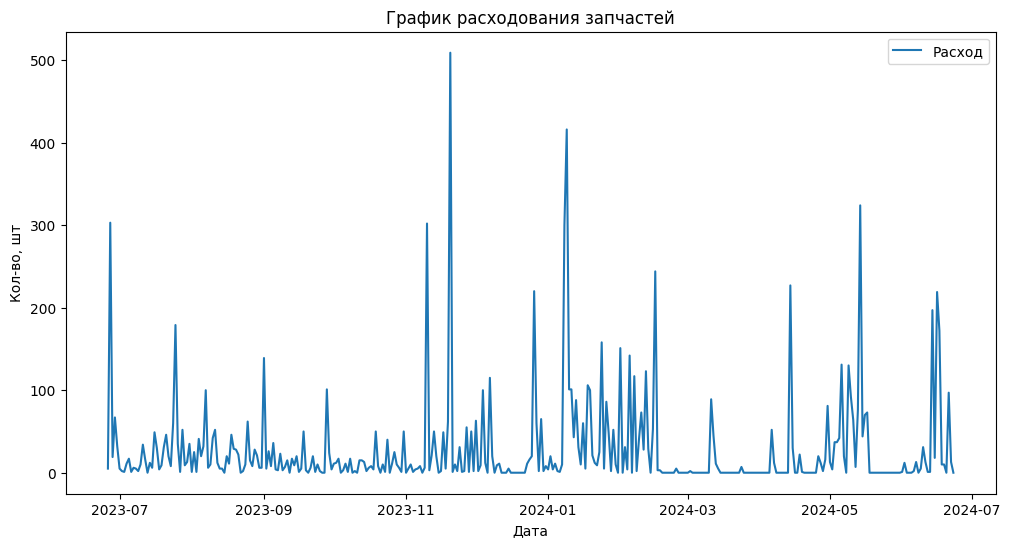

In [11]:
plt.figure(figsize=(12, 6))
plt.plot(df_m1['Дата'], df_m1['Расход'], label='Расход')
plt.title('График расходования запчастей')
plt.xlabel('Дата')
plt.ylabel('Кол-во, шт')
plt.legend()
plt.show()

In [12]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(df_m1['Расход'])
print('ADF статистика:', result[0])
print('p-значение:', result[1])
print('Критические значения:')
for key, value in result[4].items():
    print(f'  {key}: {value}')

ADF статистика: -15.956302781659728
p-значение: 7.261817269164206e-29
Критические значения:
  1%: -3.448493650810824
  5%: -2.8695352280356556
  10%: -2.5710293341377715


In [13]:
from statsmodels.tsa.arima.model import ARIMA

# Обучение модели ARIMA
model = ARIMA(df_m1['Расход'], order=(1, 1, 1))
model_fit = model.fit()

# Вывод статистики модели
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                 Расход   No. Observations:                  364
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -1993.283
Date:                Mon, 30 Sep 2024   AIC                           3992.565
Time:                        17:44:12   BIC                           4004.248
Sample:                             0   HQIC                          3997.209
                                - 364                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1758      0.036      4.907      0.000       0.106       0.246
ma.L1         -0.9993      0.094    -10.631      0.000      -1.183      -0.815
sigma2      3393.3947    278.659     12.178      0.0

In [14]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Прогноз на основе обученной модели
forecast = model_fit.forecast(steps=14)

mse = mean_squared_error(df_m1['Расход'][-14:], forecast)
mae = mean_absolute_error(df_m1['Расход'][-14:], forecast)

print(f'MSE: {mse}')
print(f'MAE: {mae}')

MSE: 5880.426391523303
MAE: 39.00530292538293


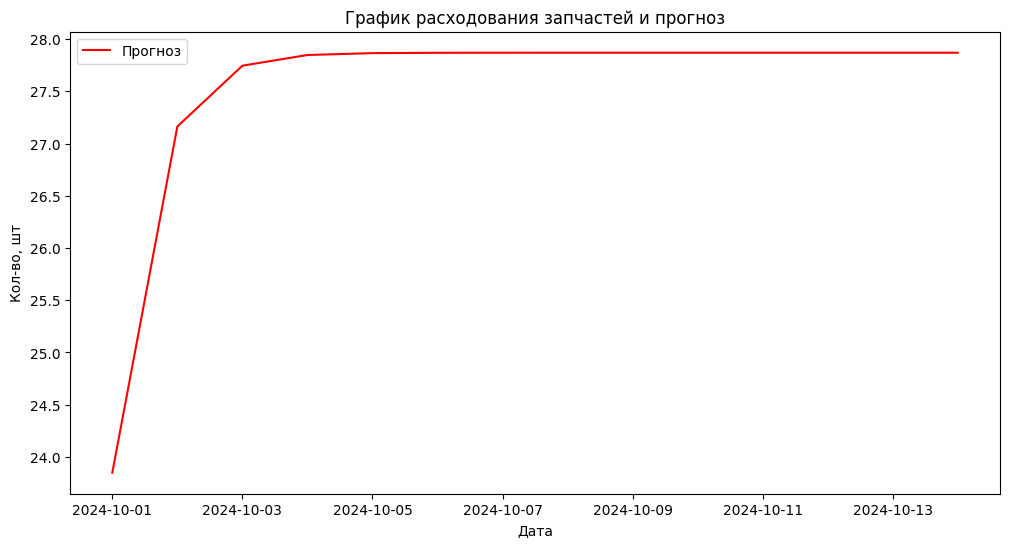

In [15]:
two_week_prediction = model_fit.forecast(steps=14)

# Новый DataFrame для будущих значений
future_dates = pd.date_range(start='2024-10-01', periods=14, freq='D')
prediction = pd.DataFrame({'Дата': future_dates, 'Прогноз расхода': two_week_prediction})

# Визуализация прогноза
plt.figure(figsize=(12, 6))
plt.plot(prediction['Дата'], prediction['Прогноз расхода'], label='Прогноз', color='red')
plt.title('График расходования запчастей и прогноз')
plt.xlabel('Дата')
plt.ylabel('Кол-во, шт')
plt.legend()
plt.savefig('Прогноз_ЛинРег_00000386.png')

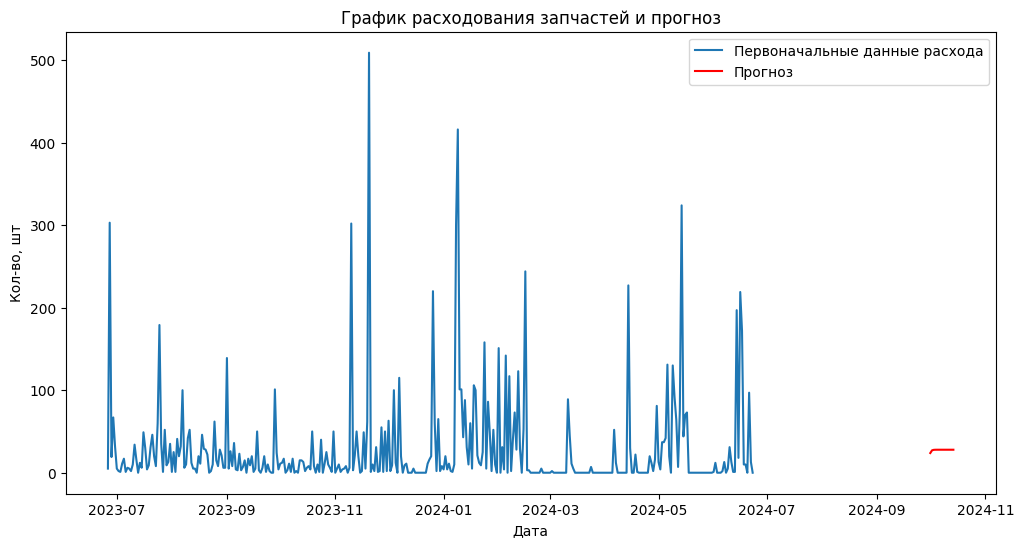

In [16]:
two_week_prediction = model_fit.forecast(steps=14)

# Новый DataFrame для будущих значений
future_dates = pd.date_range(start='2024-10-01', periods=14, freq='D')
prediction = pd.DataFrame({'Дата': future_dates, 'Прогноз расхода': two_week_prediction})

# Визуализация прогноза
plt.figure(figsize=(12, 6))
plt.plot(df_m1['Дата'], df_m1['Расход'], label='Первоначальные данные расхода')
plt.plot(prediction['Дата'], prediction['Прогноз расхода'], label='Прогноз', color='red')
plt.title('График расходования запчастей и прогноз')
plt.xlabel('Дата')
plt.ylabel('Кол-во, шт')
plt.legend()
plt.savefig('Прогноз_ЛинРег_деталь_00000386.png')
plt.show()